In [2]:
import itertools
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import figure
import glob
from datetime import datetime
import statsmodels.api as sm
from datetime import datetime, timedelta
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.metrics import mean_squared_error

C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
def read_file_to_df(path):
    all_files = glob.glob(path + '/*.csv')
    df = pd.DataFrame()
    for filename in all_files:
        temp = pd.read_csv(filename)
        df = pd.concat([df, temp])
    return df

In [4]:
def fix_data(data, name_of_pump):
    data = data[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]
    data = data.rename(columns = {'hstWaarde' : '{}'.format(name_of_pump)})
    data['datetime'] = pd.to_datetime(data['datumBeginMeting'], format = '%Y-%m-%d %H:%M:%S')
    data['datumBeginMeting'] = pd.to_datetime(data['datumBeginMeting'], format='%Y-%m-%d %H:%M:%S')
    data['datumEindeMeting'] = pd.to_datetime(data['datumEindeMeting'], format='%Y-%m-%d %H:%M:%S')
    data = data.set_index('datumBeginMeting')
    data = data.sort_index() # Datetime index
    return data

In [5]:
def first_non_zero(data, name):
    s = pd.Series(data[name])
    f = pd.DataFrame(s.iloc[s.nonzero()[0]]).reset_index()

    m_index = f['datumBeginMeting'][0]
    print(m_index)
    data3 = data.loc[m_index:,:]
    data3[name].plot()
    return data3

In [6]:
def dry_df(df):
    df = pd.read_csv(df, sep="\n", header=None)
    df.columns = ["a"]
    df['datetime'] = pd.to_datetime(df['a'], format = '%Y-%m-%d %H:%M:%S')
    df = df[['datetime']]
    return df

In [7]:
def whole_df(df):
    df = pd.read_csv('./data/den bosch/whole map/' + df + '.csv', sep="," or "\n")
    df = df.iloc[:,1:3].rename(columns = {'Begin':'Datetime', df.columns[2]:'Rain'})
    
    df = df.set_index(pd.to_datetime(df['Datetime'], format = '%Y-%m-%d %H:%M:%S'))
    df['Rain'] = df['Rain'] * 10000
    df = df.groupby(pd.TimeGrouper('H'))['Rain'].sum()

#     df['datetime'] = pd.to_datetime(df['a'], format = '%Y-%m-%d %H:%M:%S')
#     df = df.set_index(df['datetime'])
    return df

In [8]:
def filterDryDays(data, dry, name_of_pump):
    data = pd.DataFrame(data)
    dry = np.where(data.index.isin(dry['datetime']), 1, 0)
    data['dry'] = dry
    data = data[data['dry'] == 1]
    #data['interaction'] = data[name_of_pump] * data['dry']#.groupby([de_rompert.index.year, de_rompert.index.month, de_rompert.index.day, de_rompert.index.hour]).mean()
    return data

In [9]:
def joinOnRain(data, whole, name_of_pump):
    whole = pd.DataFrame(whole)
    data = pd.DataFrame(data)
    rain = np.where(whole.index.isin(data.index), 1, 0)
    data = data[data['dry'] == 1]
    #data['interaction'] = data[name_of_pump] * data['dry']#.groupby([de_rompert.index.year, de_rompert.index.month, de_rompert.index.day, de_rompert.index.hour]).mean()
    return data

In [10]:
def create_dummies(data, y):
    data['1'] = np.where(data.index.hour == 0, 1, 0)
    data['2'] = np.where(data.index.hour == 1, 1, 0)
    data['3'] = np.where(data.index.hour == 2, 1, 0)
    data['4'] = np.where(data.index.hour == 3, 1, 0)
    data['5'] = np.where(data.index.hour == 4, 1, 0)
    data['6'] = np.where(data.index.hour == 5, 1, 0)
    data['7'] = np.where(data.index.hour == 6, 1, 0)
    data['8'] = np.where(data.index.hour == 7, 1, 0)
    data['9'] = np.where(data.index.hour == 8, 1, 0)
    data['10'] = np.where(data.index.hour == 9, 1, 0)
    data['11'] = np.where(data.index.hour == 10, 1, 0)
    data['12'] = np.where(data.index.hour == 11, 1, 0)
    data['13'] = np.where(data.index.hour == 12, 1, 0)
    data['14'] = np.where(data.index.hour == 13, 1, 0)
    data['15'] = np.where(data.index.hour == 14, 1, 0)
    data['16'] = np.where(data.index.hour == 15, 1, 0)
    data['17'] = np.where(data.index.hour == 16, 1, 0)
    data['18'] = np.where(data.index.hour == 17, 1, 0)
    data['19'] = np.where(data.index.hour == 18, 1, 0)
    data['20'] = np.where(data.index.hour == 19, 1, 0)
    data['21'] = np.where(data.index.hour == 20, 1, 0)
    data['22'] = np.where(data.index.hour == 21, 1, 0)
    data['23'] = np.where(data.index.hour == 22, 1, 0)
    
    data['monday'] = np.where(data.index.day == 0, 1, 0)
    data['tuesday'] = np.where(data.index.day == 1, 1, 0)
    data['wednesday'] = np.where(data.index.day == 2, 1, 0)
    data['thursday'] = np.where(data.index.day == 3, 1, 0)
    data['friday'] = np.where(data.index.day == 4, 1, 0)
    data['saturday'] = np.where(data.index.day == 5, 1, 0)
    
    data['january'] = np.where(data.index.month == 1, 1, 0)
    data['february'] = np.where(data.index.month == 2, 1, 0)
    data['march'] = np.where(data.index.month == 3, 1, 0)
    data['april'] = np.where(data.index.month == 4, 1, 0)
    data['may'] = np.where(data.index.month == 5, 1, 0)
    data['june'] = np.where(data.index.month == 6, 1, 0)
    data['july'] = np.where(data.index.month == 7, 1, 0)
    data['august'] = np.where(data.index.month == 8, 1, 0)
    data['september'] = np.where(data.index.month == 9, 1, 0)
    data['october'] = np.where(data.index.month == 10, 1, 0)
    data['november'] = np.where(data.index.month == 11, 1, 0)
    
#     data['1hour'] = data[y].shift(-1)
#     data['2hours'] = data[y].shift(-2)
#     data['3hours'] = data[y].shift(-3)
    
    return data

In [11]:
def RF_model(data, name):
    X = (data.drop([name], axis = 1))
    y = (data[name])
    
    X_train = X.iloc[:round(0.8*len(X)),:]
    y_train = y.iloc[:round(0.8*len(y))]            
    
    X_test = X.iloc[round(0.8*len(X)):,:]  
    y_test = y.iloc[round(0.8*len(y)):]
    
    RF_Model = RandomForestRegressor(n_estimators=200, max_features=34, oob_score=True)
    
    labels = y_train#[:, None]
    features = X_train

    rgr=RF_Model.fit(features, labels)
    
    X_test_predict2 = rgr.predict(X_test)
    validation = pd.DataFrame(X_test_predict2, y_test).reset_index().rename(columns = {name:'Real flow', 0:'Prediction Flow'})

    validation = validation.set_index(X_test.index)
    
    return validation

In [12]:
def complete_preprocess_for_model(path, name, dry_filename, whole_df_name):
    data = read_file_to_df(path)
    data = fix_data(data, name)
    data = first_non_zero(data, name)
    data = data.groupby(pd.TimeGrouper('H'))[name].mean()
    dry = dry_df(dry_filename)
    whole = whole_df(whole_df_name)
    data = filterDryDays(data, dry, name)
    data = create_dummies(data, name)
    data2 = RF_model(data, name)
    return data ,data2, dry, whole


C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


2018-04-19 10:40:00


C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """
C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  import sys


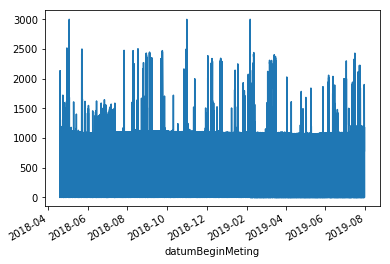

In [13]:
original, de_rompert, dry_rompert, whole_rompert = complete_preprocess_for_model('./data/den bosch/sewer_data_db/flow/de Rompert/', 'de_rompert', 'dry_rompert', 'whole_rompert')

In [14]:
def match_data(original, predicted):
    matched = pd.merge(original, predicted, left_index=True, right_index=True)
    matched['constant prediction'] = matched['Prediction Flow'].rolling(window = 24).mean()
    matched = matched.dropna()
    matched['total_rompert'] = matched['de_rompert'].cumsum()
    matched['total_model'] = matched['constant prediction'].cumsum()
    matched['difference'] = matched['total_rompert'] - matched['total_model']
    return matched
matched = match_data(original, de_rompert)
matched.head()

,de_rompert,dry,1,2,3,4,5,6,7,8,...,august,september,october,november,Real flow,Prediction Flow,constant prediction,total_rompert,total_model,difference
datumBeginMeting,,,,,,,,,,,,,,,,,,,,,
2019-05-04 23:00:00,247.656667,1,0,0,0,0,0,0,0,0,...,0,0,0,0,247.656667,307.128035,418.531752,247.656667,418.531752,-170.875085
2019-05-05 00:00:00,237.385000,1,1,0,0,0,0,0,0,0,...,0,0,0,0,237.385000,290.406925,414.963925,485.041667,833.495677,-348.454010
2019-05-05 01:00:00,195.285000,1,0,1,0,0,0,0,0,0,...,0,0,0,0,195.285000,237.069337,407.935115,680.326667,1241.430791,-561.104125
2019-05-05 02:00:00,141.865000,1,0,0,1,0,0,0,0,0,...,0,0,0,0,141.865000,199.548358,399.778312,822.191667,1641.209103,-819.017437
2019-05-05 03:00:00,171.635000,1,0,0,0,1,0,0,0,0,...,0,0,0,0,171.635000,136.933538,389.134156,993.826667,2030.343259,-1036.516592


In [15]:
def match_data2(original, predicted):
    matched = pd.merge(original, predicted, left_index=True, right_index=True)
    date_mean = matched.groupby(pd.TimeGrouper('D'))['Prediction Flow'].transform('mean')
    date_mean = pd.DataFrame(date_mean)
    date_mean = date_mean.rename(columns = {'Prediction Flow' : 'constant prediction'})
    date_mean.index = date_mean.index + pd.DateOffset(1)
    matched = pd.merge(matched, date_mean, left_index=True, right_index=True)
    
    matched = matched.dropna()
    matched['total_rompert'] = matched['de_rompert'].cumsum()
    matched['total_model'] = matched['constant prediction'].cumsum()
    matched['difference'] = matched['total_rompert'] - matched['total_model']
    return matched
matched = match_data2(original, de_rompert)
matched

C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


,de_rompert,dry,1,2,3,4,5,6,7,8,...,august,september,october,november,Real flow,Prediction Flow,constant prediction,total_rompert,total_model,difference
datumBeginMeting,,,,,,,,,,,,,,,,,,,,,
2019-05-03 19:00:00,355.105000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,355.105000,402.414835,389.113399,355.105000,389.113399,-34.008399
2019-05-03 20:00:00,328.631667,1,0,0,0,0,0,0,0,0,...,0,0,0,0,328.631667,469.213222,389.113399,683.736667,778.226797,-94.490131
2019-05-03 21:00:00,327.933333,1,0,0,0,0,0,0,0,0,...,0,0,0,0,327.933333,456.526266,389.113399,1011.670000,1167.340196,-155.670196
2019-05-03 22:00:00,309.788333,1,0,0,0,0,0,0,0,0,...,0,0,0,0,309.788333,373.154625,389.113399,1321.458333,1556.453595,-234.995262
2019-05-04 17:00:00,301.906667,1,0,0,0,0,0,0,0,0,...,0,0,0,0,301.906667,314.563702,589.136687,1623.365000,2145.590281,-522.225281
2019-05-04 18:00:00,344.430000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,344.430000,320.606498,589.136687,1967.795000,2734.726968,-766.931968
2019-05-04 19:00:00,329.518333,1,0,0,0,0,0,0,0,0,...,0,0,0,0,329.518333,363.363443,589.136687,2297.313333,3323.863655,-1026.550321
2019-05-04 20:00:00,327.056667,1,0,0,0,0,0,0,0,0,...,0,0,0,0,327.056667,368.863275,589.136687,2624.370000,3913.000341,-1288.630341
2019-05-04 21:00:00,306.388333,1,0,0,0,0,0,0,0,0,...,0,0,0,0,306.388333,353.322688,589.136687,2930.758333,4502.137028,-1571.378695


In [16]:
# def add_correction(data):
#     data['correction'] = 0
#     for i in range(len(data)):
#         if data.iloc[i,data.columns.get_loc("difference")] > 0:
# #             print(data.iloc[i,data.columns.get_loc("difference")])
#             try:
#                 data.iloc[i + 1, data.columns.get_loc('correction')] = data.iloc[i, data.columns.get_loc("difference")]
#                 date_mean = matched.groupby(pd.TimeGrouper('D'))['Prediction Flow'].transform('mean')
#             except:
#                 continue
#     return data
        
# matched2 = add_correction(matched)
# matched2

In [25]:
def add_correction2(data):
    count = data.groupby(pd.TimeGrouper('D'))['difference'].transform('count')

    correction = data.groupby(pd.TimeGrouper('D'))['difference'].transform('max') / count
    
    correction = pd.DataFrame(correction)
    correction = correction.rename(columns = {'difference' : 'correction'})
    correction.index = correction.index + pd.DateOffset(1)
    correction[correction['correction'] < 0] = 0
    data = pd.merge(data, correction, left_index=True, right_index=True)
    data['adjusted constant prediction'] = data['constant prediction'] + data['correction']
    data['adjusted total model'] = data['adjusted constant prediction'].cumsum()
    data['difference adjusted model'] = data['total_rompert'] - data['adjusted total model']


    return(data)
matched2 = add_correction2(matched)
matched2

C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  
C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.


,de_rompert,dry,1,2,3,4,5,6,7,8,...,Real flow,Prediction Flow,constant prediction,total_rompert,total_model,difference,correction,adjusted constant prediction,adjusted total model,difference adjusted model
datumBeginMeting,,,,,,,,,,,,,,,,,,,,,
2019-05-04 19:00:00,329.518333,1,0,0,0,0,0,0,0,0,...,329.518333,363.363443,589.136687,2297.313333,3323.863655,-1026.550321,0.000000,589.136687,589.136687,1708.176647
2019-05-04 20:00:00,327.056667,1,0,0,0,0,0,0,0,0,...,327.056667,368.863275,589.136687,2624.370000,3913.000341,-1288.630341,0.000000,589.136687,1178.273373,1446.096627
2019-05-04 21:00:00,306.388333,1,0,0,0,0,0,0,0,0,...,306.388333,353.322688,589.136687,2930.758333,4502.137028,-1571.378695,0.000000,589.136687,1767.410060,1163.348274
2019-05-04 22:00:00,307.890000,1,0,0,0,0,0,0,0,0,...,307.890000,344.792270,589.136687,3238.648333,5091.273714,-1852.625381,0.000000,589.136687,2356.546746,882.101587
2019-05-09 23:00:00,1126.961667,1,0,0,0,0,0,0,0,0,...,1126.961667,318.310141,275.864401,14219.790000,12030.329485,2189.460515,0.000000,275.864401,2632.411148,11587.378852
2019-05-10 00:00:00,1039.606667,1,1,0,0,0,0,0,0,0,...,1039.606667,297.422029,275.864401,15259.396667,12306.193887,2953.202780,91.227521,367.091923,2999.503070,12259.893596
2019-05-10 01:00:00,1030.933333,1,0,1,0,0,0,0,0,0,...,1030.933333,225.745870,275.864401,16290.330000,12582.058288,3708.271712,91.227521,367.091923,3366.594993,12923.735007
2019-05-10 02:00:00,746.765000,1,0,0,1,0,0,0,0,0,...,746.765000,183.054983,275.864401,17037.095000,12857.922689,4179.172311,91.227521,367.091923,3733.686916,13303.408084
2019-05-10 03:00:00,420.091667,1,0,0,0,1,0,0,0,0,...,420.091667,131.215154,275.864401,17457.186667,13133.787090,4323.399576,91.227521,367.091923,4100.778838,13356.407828


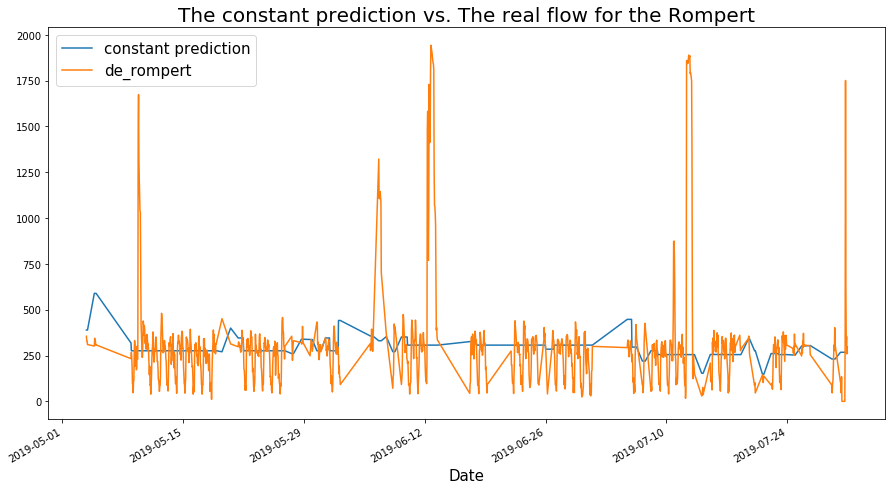

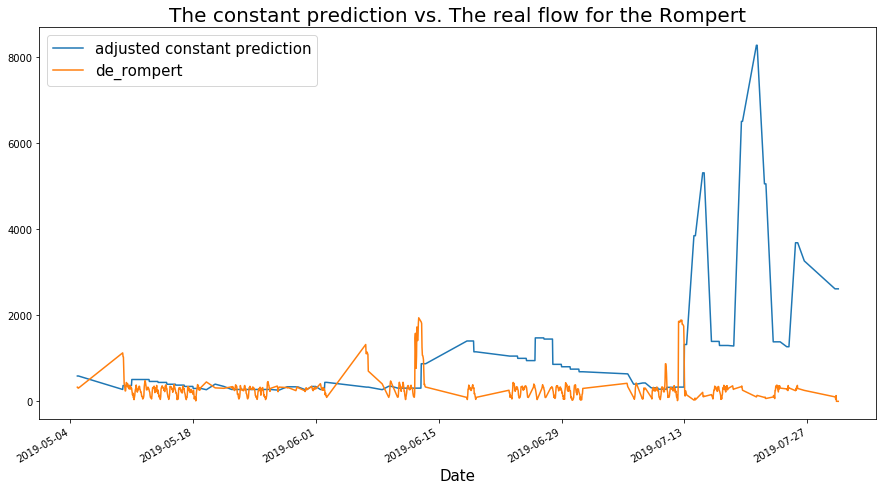

In [20]:
ax = matched[['constant prediction', 'de_rompert']].plot(figsize=(15,8))
ax.set_title('The constant prediction vs. The real flow ' + 'for the Rompert', size = 20)
ax.set_xlabel('Date', size = 15)
ax.legend(prop={'size': 15})

ax = matched2[['adjusted constant prediction', 'de_rompert']].plot(figsize=(15,8))
ax.set_title('The constant prediction vs. The real flow ' + 'for the Rompert', size = 20)
ax.set_xlabel('Date', size = 15)
ax.legend(prop={'size': 15})

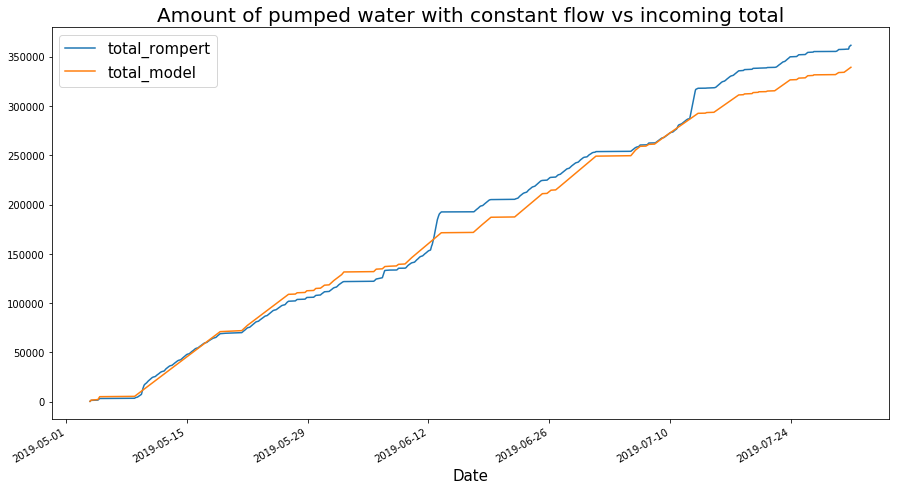

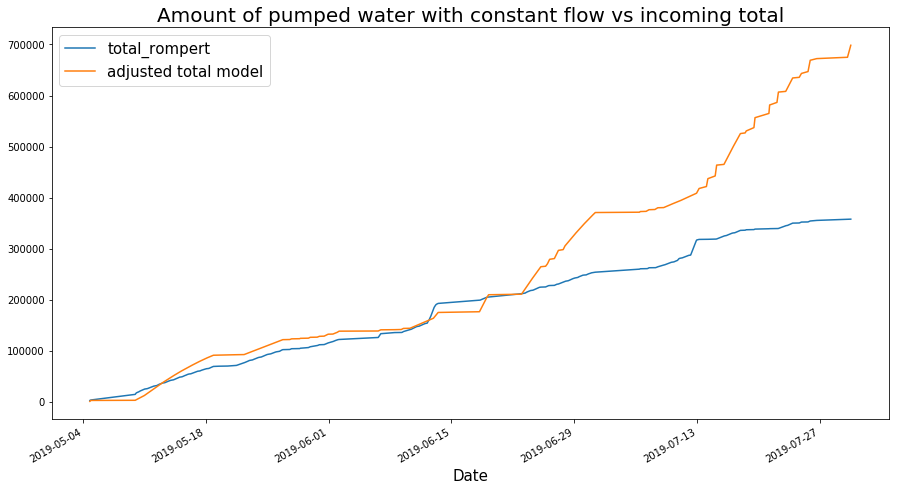

In [23]:
ax = matched[['total_rompert', 'total_model']].plot(figsize=(15,8))
ax.set_title('Amount of pumped water with constant flow vs incoming total', size = 20)
ax.set_xlabel('Date', size = 15)
ax.legend(prop={'size': 15})

ax = matched2[['total_rompert', 'adjusted total model']].plot(figsize=(15,8))
ax.set_title('Amount of pumped water with constant flow vs incoming total', size = 20)
ax.set_xlabel('Date', size = 15)
ax.legend(prop={'size': 15})

Text(0.5,1,'difference in pumped water vs incoming water')

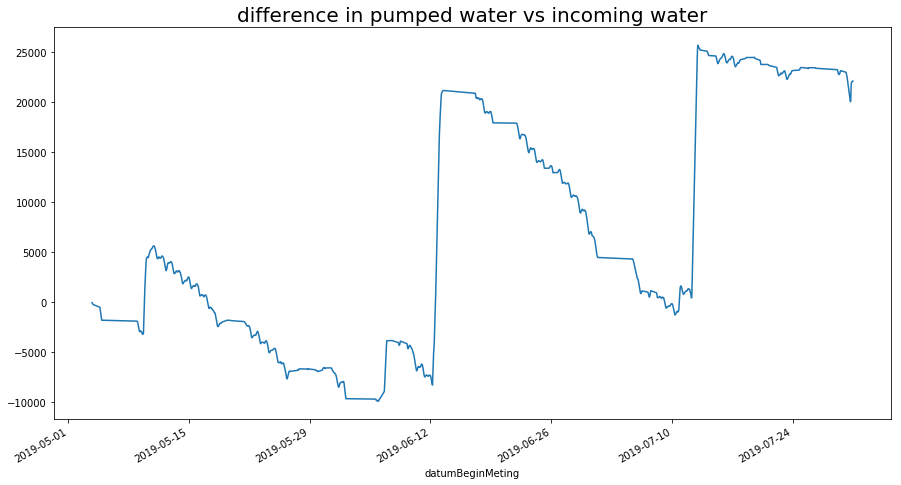

In [34]:
matched['difference'] = matched['total_rompert'] - matched['total_model']
ax = matched.difference.plot(figsize = (15,8))
ax.set_title('difference in pumped water vs incoming water', size = 20)

matched['difference'] = matched['total_rompert'] - matched['total_model']
ax = matched.difference.plot(figsize = (15,8))
ax.set_title('difference in pumped water vs incoming water', size = 20)

In [35]:
matched.head()

,de_rompert,dry,1,2,3,4,5,6,7,8,...,august,september,october,november,Real flow,Prediction Flow,constant prediction,total_rompert,total_model,difference
datumBeginMeting,,,,,,,,,,,,,,,,,,,,,
2019-05-03 19:00:00,355.105000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,355.105000,391.811539,387.200774,355.105000,387.200774,-32.095774
2019-05-03 20:00:00,328.631667,1,0,0,0,0,0,0,0,0,...,0,0,0,0,328.631667,457.414164,387.200774,683.736667,774.401547,-90.664880
2019-05-03 21:00:00,327.933333,1,0,0,0,0,0,0,0,0,...,0,0,0,0,327.933333,437.401533,387.200774,1011.670000,1161.602321,-149.932321
2019-05-03 22:00:00,309.788333,1,0,0,0,0,0,0,0,0,...,0,0,0,0,309.788333,373.426466,387.200774,1321.458333,1548.803094,-227.344761
2019-05-04 17:00:00,301.906667,1,0,0,0,0,0,0,0,0,...,0,0,0,0,301.906667,313.394615,580.818846,1623.365000,2129.621940,-506.256940
